In [2]:
import pandas as pd
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

In [4]:
data=[]
for i in range(200):
    data.append(np.random.randint(low=1, high=100, size=2))
x_data = pd.DataFrame(data)
x_data.columns =['col1','col2']
x_data.head()

,col1,col2
0,60,77
1,90,13
2,52,10
3,62,87
4,60,40


In [13]:
k=int(input('enter no of cluster')) 
t=int(input('enter value of iteration'))

enter no of cluster4
enter value of iteration15


In [14]:
#initial seed point of kmeans
initial= rd.sample([i for i in range(len(data))], k)

In [15]:
##Distance matrix
def distance(k,d):
    dist=[]
    for i in k:
        p=[]
        for j in range(len(d)):
            q=d.iloc[j:j+1].values
            q=q[0]
            dis=0
            for l in range(len(q)):
                dis=dis+(float(i[l])-float(q[l]))**2
            p.append(math.sqrt(dis))
        dist.append(p)
    return dist

In [16]:
#center of the initial cluster
initial_p=[]
for i in initial:
    p=x_data.iloc[i:i+1].values
    p=p[0]
    initial_p.append(p)

dis_matrix=distance(initial_p,x_data)
for l in range(t):
    new_k=[] 
    index=[]
    for i in range(len(dis_matrix[0])):
        temp=[]
        for j in range(len(dis_matrix)):
            temp.append(dis_matrix[j][i])
        index.append(temp.index(min(temp)))
    for i in range(k):
        count=0
        su=[]
        su=np.array([0 for k in range(len(x_data.columns))])
        for j in range(len(x_data)):
            if index[j]==i:
                count+=1
                loc=x_data.iloc[j:j+1].values
                su=np.add(su,np.array(loc[0]))
        su=su/count
        new_k.append(su)
    dis_matrix=distance(new_k,x_data)

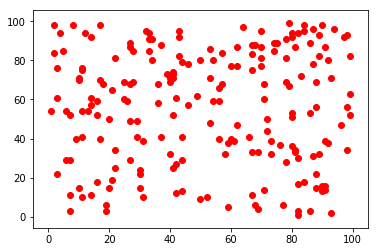

In [17]:

for i in range(len(data)):
    x=x_data.iloc[i:i+1,0:1].values
    y=x_data.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], c='r', label='data')
plt.show()

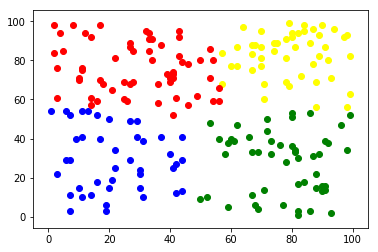

In [18]:
color=['red','blue','yellow','green','cyan','purple']
for i in range(len(data)):
    x=x_data.iloc[i:i+1,0:1].values
    y=x_data.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], color=color[index[i]])
plt.show()